# **AA6**

### Conforme vayan poniendo las justificaciones, van escribiendo sus nombres por favor
### Además cada justificación o markdown le van poniendo con estilos, listas, tamaños de fuente para que se vea elegante 🙏 :) 
### En cuanto al código y gráficos ya está todo
### *En donde toca poner las justificaciones les dejo con esta letra el item a responder*

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
)
from sklearn.feature_selection import SelectKBest, f_classif

## 1) Selección del dataset

Este dataset contiene el conteo **por hora** de bicicletas alquiladas entre los años **2011 y 2012** en el sistema **Capital Bike Share**, junto con información correspondiente al **clima** y a la **estación** del año.

---
# *Justifiquen la selección del dataset: ¿Por qué es relevante?*
# *¿Qué preguntas de investigación pueden responder con estos datos?* 
# *Formulen al menos dos preguntas de investigación o hipótesis que guiarán el análisis.*
---

## Información de atributos:

* **instant**: índice del registro
* **dteday**: fecha
* **season**: estación
    * 1: primavera
    * 2: verano
    * 3: otoño
    * 4: invierno
* **yr**: año
    * 0: 2011
    * 1: 2012
* **mnth**: mes (1 a 12)
* **hr**: hora (0 a 23)
* **holiday**: indica si el día es feriado o no
* **weekday**: día de la semana
* **workingday**: 1 si el día no es fin de semana ni feriado; caso contrario 0
* **weathersit**: situación del clima
    * 1: Despejado, pocas nubes, parcialmente nublado
    * 2: Neblina + nublado / neblina + nubes dispersas, etc.
    * 3: Nieve ligera, lluvia ligera + tormenta + nubes dispersas, lluvia ligera + nubes dispersas
    * 4: Lluvia fuerte + granizo + tormenta + neblina, nieve + niebla
* **temp**: temperatura normalizada en Celsius. Valores derivados por: $(t - t_{min}) / (t_{max} - t_{min})$ siendo $t_{min} = -8$ y $t_{max} = +39$
* **atemp**: sensación térmica normalizada en Celsius. Valores derivados por: $(t - t_{min}) / (t_{max} - t_{min})$ siendo $t_{min} = -16$ y $t_{max} = +50$
* **hum**: humedad normalizada (los valores se dividen para 100)
* **windspeed**: velocidad del viento normalizada (los valores se dividen para 67)
* **casual**: conteo de usuarios casuales
* **registered**: conteo de usuarios registrados
* **cnt**: conteo total de bicicletas alquiladas (casual + registered)

In [2]:
# Carga el conjunto de datos desde un archivo CSV
df = pd.read_csv('hour.csv')

In [3]:
# Muestra las primeras filas del DataFrame
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Muestra información resumida sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# Muestra estadísticas descriptivas del DataFrame
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
# Convierte la columna 'dteday' a tipo categórico
df['dteday'] = df['dteday'].astype('category')

In [7]:
# Elimina la columna 'instant' del DataFrame y crea una copia
df=df.drop(columns=['instant']).copy()
# Muestra información resumida sobre el DataFrame después de las modificaciones
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   dteday      17379 non-null  category
 1   season      17379 non-null  int64   
 2   yr          17379 non-null  int64   
 3   mnth        17379 non-null  int64   
 4   hr          17379 non-null  int64   
 5   holiday     17379 non-null  int64   
 6   weekday     17379 non-null  int64   
 7   workingday  17379 non-null  int64   
 8   weathersit  17379 non-null  int64   
 9   temp        17379 non-null  float64 
 10  atemp       17379 non-null  float64 
 11  hum         17379 non-null  float64 
 12  windspeed   17379 non-null  float64 
 13  casual      17379 non-null  int64   
 14  registered  17379 non-null  int64   
 15  cnt         17379 non-null  int64   
dtypes: category(1), float64(4), int64(11)
memory usage: 2.0 MB


In [8]:
# Muestra las primeras 10 filas del DataFrame
df.head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [9]:
# Muestra información resumida sobre el DataFrame después de las modificaciones
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   dteday      17379 non-null  category
 1   season      17379 non-null  int64   
 2   yr          17379 non-null  int64   
 3   mnth        17379 non-null  int64   
 4   hr          17379 non-null  int64   
 5   holiday     17379 non-null  int64   
 6   weekday     17379 non-null  int64   
 7   workingday  17379 non-null  int64   
 8   weathersit  17379 non-null  int64   
 9   temp        17379 non-null  float64 
 10  atemp       17379 non-null  float64 
 11  hum         17379 non-null  float64 
 12  windspeed   17379 non-null  float64 
 13  casual      17379 non-null  int64   
 14  registered  17379 non-null  int64   
 15  cnt         17379 non-null  int64   
dtypes: category(1), float64(4), int64(11)
memory usage: 2.0 MB


## 2) Preprocesamiento 

### **2.1. Tratamiento de Valores Nulos**

In [10]:
# Cuenta los valores faltantes en cada columna del DataFrame
df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Cuenta los valores nulos en cada columna del DataFrame
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 Se verificó la existencia de valores nulos mediante las funciones `df.isna().sum()` y `df.isnull().sum()`. En este conjunto de datos no se evidencian valores nulos (conteos en 0), por lo que no fue necesario realizar procesos de imputación ni eliminación de registros. 

 **Nota metodológica:** En caso de detectar valores faltantes en variables numéricas, la estrategia predefinida sería la **imputación por mediana**, debido a su robustez ante valores atípicos (*outliers*), asegurando así la integridad de la información sin sesgar la distribución del conjunto de datos.

In [12]:
# Identifica las columnas numéricas para realizar el análisis estadístico
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(len(numeric_cols))

15


### **2.2. Detección de Outliers (Boxplot + IQR)**

In [13]:
# Cálculo de los cuartiles Q1 (25%) y Q3 (75%) para definir el rango intercuartílico
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define los límites estadísticos superior e inferior (vallas de Tukey)
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Cuenta y ordena de forma descendente los valores atípicos detectados por columna
outliers_por_col = ((df[numeric_cols] < lim_inf) | (df[numeric_cols] > lim_sup)).sum().sort_values(ascending=False)
outliers_por_col

casual        1192
registered     680
cnt            505
holiday        500
windspeed      342
hum             22
weathersit       3
season           0
yr               0
mnth             0
hr               0
weekday          0
workingday       0
temp             0
atemp            0
dtype: int64

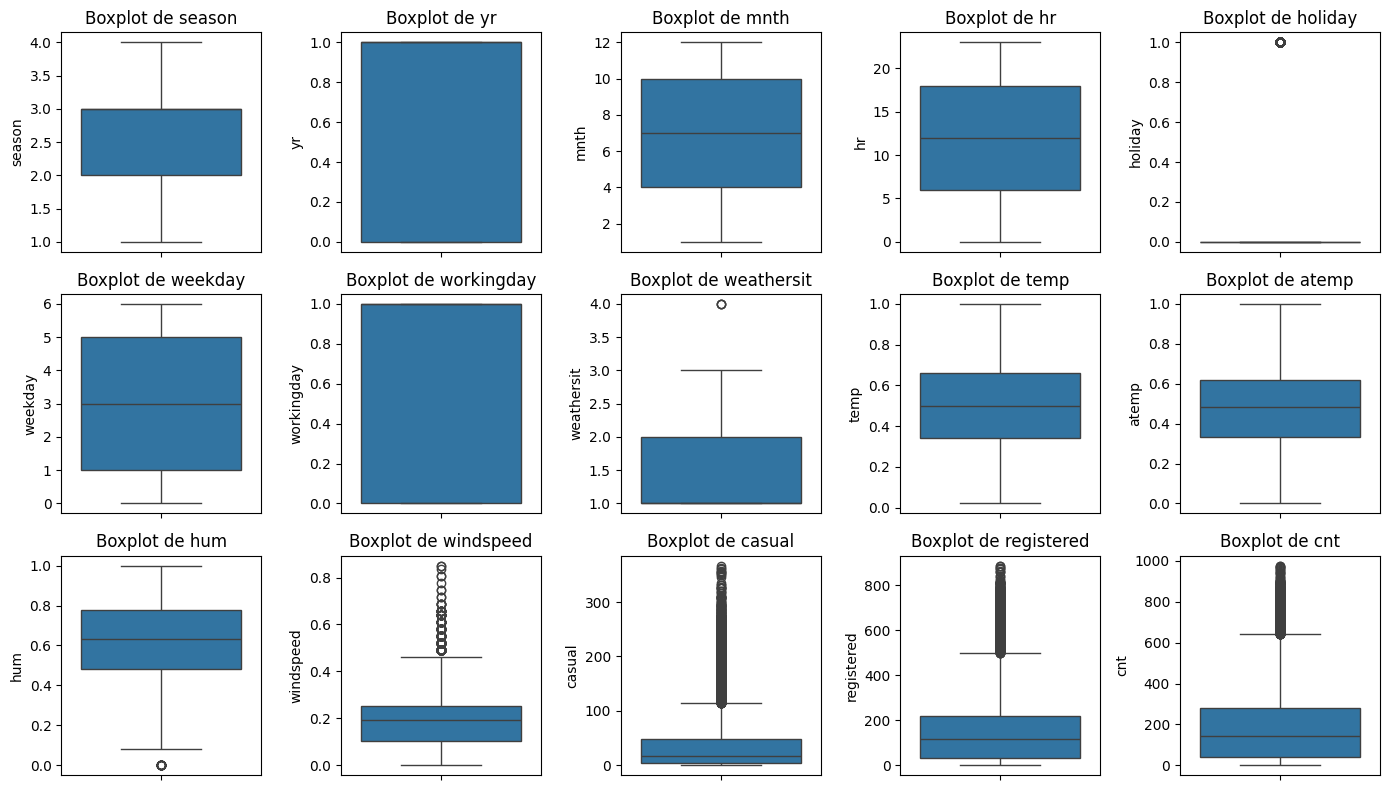

In [14]:
# Configura una cuadrícula de visualización para los boxplots
plt.figure(figsize=(14,8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 5, i + 1)
    # Genera el diagrama de caja para visualizar la dispersión y los outliers (puntos fuera de los bigotes)
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

# *Indicar el compartamiento de estas variables del gráfico arriba*

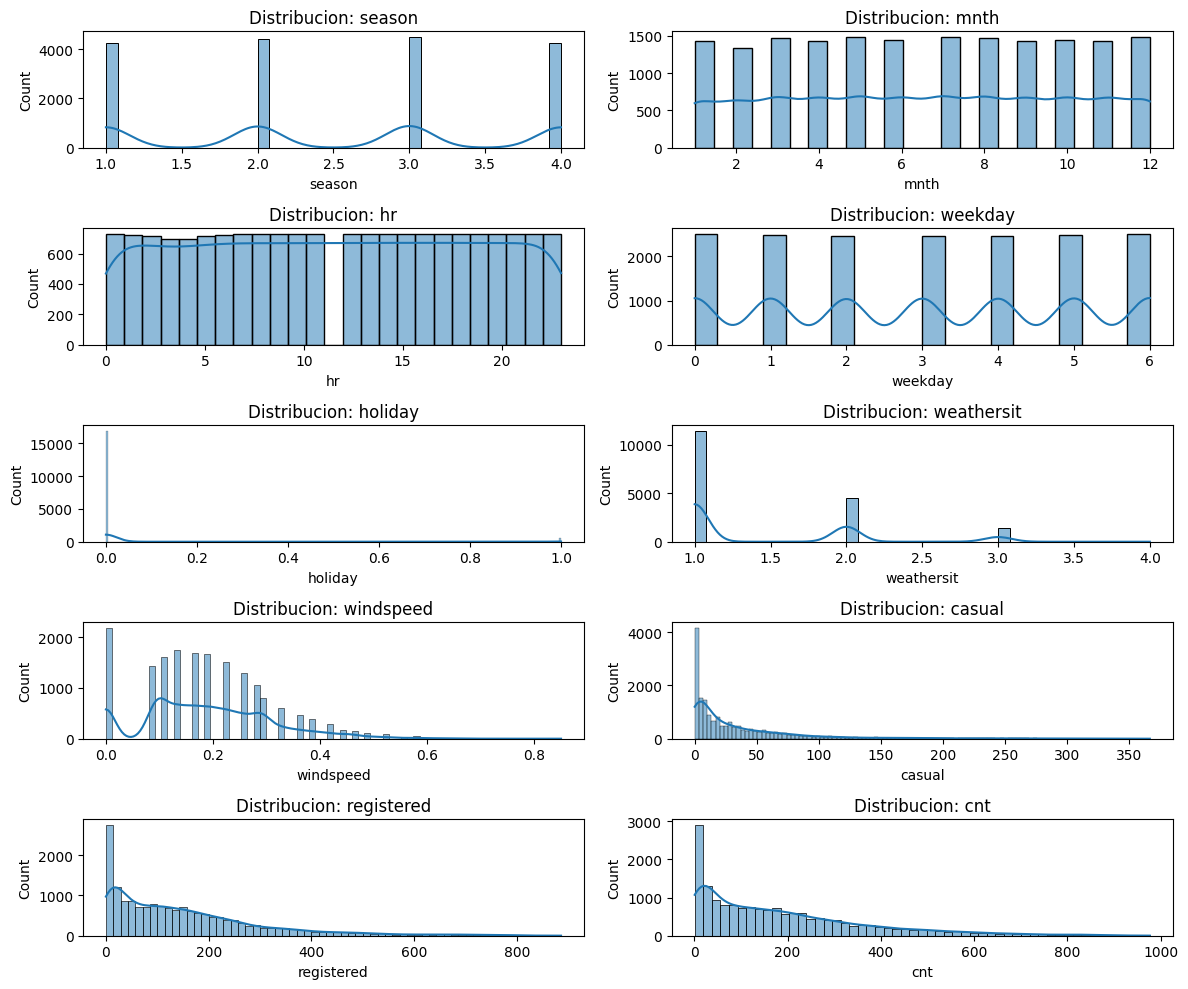

In [ ]:
# --- Análisis de Variables Numéricas (Distribución) ---
# Lista de variables cuantitativas a evaluar
num_cols = ["season", "mnth", "hr", "weekday", "holiday","weathersit","windspeed","casual","registered","cnt"]
plt.figure(figsize=(12,10))

# Bucle para automatizar la creación de histogramas por cada variable
for i,c in enumerate(num_cols,1):
    plt.subplot(5,2,i)
    # Histograma con curva KDE para verificar simetría y normalidad de los datos
    sns.histplot(df[c], kde=True) 
    plt.title(f"Distribución: {c}")
# Ajuste automático de espacios entre subplots y visualización
plt.tight_layout()
plt.show()

 Se analizaron los valores atípicos (*outliers*) visualmente mediante diagramas de caja (*boxplots*) para todas las variables numéricas. Adicionalmente, se cuantificaron utilizando el método del **Rango Intercuartílico (IQR)**, estableciendo los límites técnicos en $[Q1 - 1.5 \times IQR]$ y $[Q3 + 1.5 \times IQR]$.

 **Decisión técnica:** Se optó por mantener las distribuciones en su estado original. Aunque los gráficos muestran que algunas variables no siguen una distribución estrictamente normal, se determinó que la aplicación de técnicas como la **winsorización** o la eliminación de registros podría inducir una pérdida de información relevante para el modelo.
### Problemas encontrados en el dataset (hour.csv) y como los resolvimos

- **Columnas irrelevantes para el analisis**
  - **Problema:** `instant` funciona como un identificador/indice y no aporta valor predictivo real.
  - **Solucion:** se elimino la columna con `df = df.drop(columns=["instant"])` para evitar ruido en el modelado.

- **Posibles valores nulos**
  - **Problema:** antes de preprocesar era necesario confirmar si existian nulos que afecten el entrenamiento.
  - **Solucion:** se verifico con `df.isna().sum()` / `df.isnull().sum()` y, al no encontrar nulos relevantes, no se aplico imputacion ni eliminacion de filas.

- **Diferencias de escala entre variables numericas**
  - **Problema:** algunas variables estaban en escalas distintas, lo que puede afectar metodos como regresion logistica.
  - **Solucion:** se realizo **escalado manual** (sin sklearn) usando una funcion de **normalizacion Min-Max** (`normalize_column()`), llevando variables seleccionadas a rango `[0,1]`.


### **2.3. Escalado Manual (sin scikit-learn)**

In [16]:
# Lista de columnas para normalización
por_norma = ["season","mnth","hr","weekday","weathersit","casual", "registered","cnt"]
print(len(por_norma))

8


In [17]:
# Función para normalizar columnas utilizando Min-Max Scaling
def normalize_column(X):
    # Obtiene el valor mínimo de cada columna del DataFrame (eje 0 = vertical)
    min = X.min(axis=0)
    
    # Obtiene el valor máximo de cada columna del DataFrame
    max = X.max(axis=0)
    
    # Calcula la diferencia entre el máximo y el mínimo (rango total de los datos)
    # Este será el divisor para comprimir los datos a escala 0-1
    denominator = (max - min)
    
    # Aplica la fórmula de normalización y retorna el DataFrame transformado
    # El resultado asegura que el valor mínimo original sea 0 y el máximo sea 1
    return (X - min) / denominator

In [18]:
# Aplica la normalización a las columnas seleccionadas del DataFrame
df[por_norma] = normalize_column(df[por_norma])

**Justificación técnica de la normalización:**
Se eligió este método en lugar de la estandarización por las siguientes razones:
* **Escalas heterogéneas:** Facilita la comparación entre variables con unidades y rangos muy distintos (como temperatura, humedad y velocidad del viento).
* **Estabilidad numérica:** Mejora la convergencia y estabilidad de modelos basados en gradientes, como la **Regresión Logística**.
* **Interpretación acotada:** Dado que muchas variables del dataset ya se encuentran en rangos definidos, la normalización preserva la interpretación dentro de límites estrictos de 0 a 1.

In [19]:
# Muestra las primeras 5 filas del DataFrame con las columnas normalizadas
df[por_norma].head(5)

,season,mnth,hr,weekday,weathersit,casual,registered,cnt
0,0.0,0.0,0.000000,1.0,0.0,0.008174,0.014673,0.015369
1,0.0,0.0,0.043478,1.0,0.0,0.021798,0.036117,0.039959
2,0.0,0.0,0.086957,1.0,0.0,0.013624,0.030474,0.031762
3,0.0,0.0,0.130435,1.0,0.0,0.008174,0.011287,0.012295
4,0.0,0.0,0.173913,1.0,0.0,0.000000,0.001129,0.000000


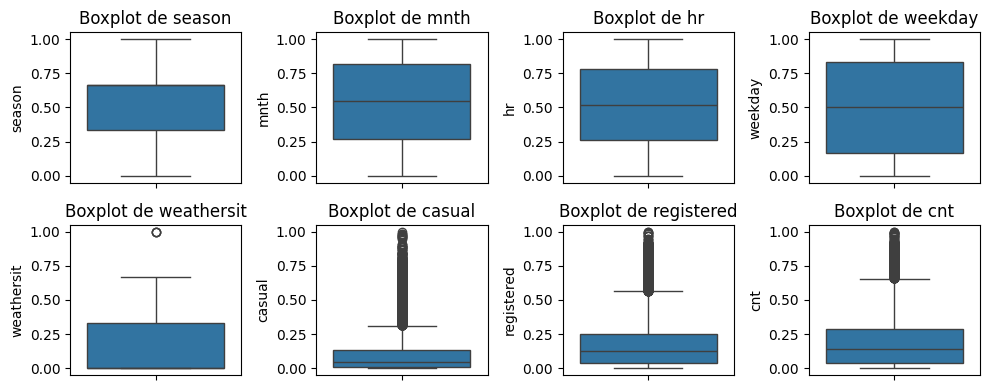

In [20]:
# Visualización de boxplots para las columnas normalizadas
plt.figure(figsize=(10,4))
for i, col in enumerate(por_norma):
    plt.subplot(2, 4, i + 1)

    sns.boxplot(y=col, data=df)

    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

### **2.4. Codificación de Variables Categóricas**

In [21]:
# Codificación one-hot de la columna 'dteday' y eliminación de la primera categoría para evitar multicolinealidad
df_encoded=pd.get_dummies(df, columns=['dteday'], drop_first=True,dtype=np.float64)
# Muestra información resumida sobre el DataFrame codificado
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Columns: 745 entries, season to dteday_2012-12-31
dtypes: float64(742), int64(3)
memory usage: 98.8 MB


Se aplicó `pd.get_dummies()` para transformar las variables categóricas en columnas binarias (*one-hot*). En el caso de `dteday`, al ser una fecha, se codificó como categorías para que el modelo pueda captar patrones por día sin asumir una relación lineal directa.

Se usó `drop_first=True` para evitar la multicolinealidad (*dummy variable trap*) y se fijó `dtype=np.float64` para asegurar la compatibilidad con los modelos de **scikit-learn**.

In [22]:
# Muestra la forma del DataFrame con la columna 'cnt'
df.shape

(17379, 16)

In [23]:
# Muestra las primeras 5 filas del DataFrame con las columnas normalizadas
df.head(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,0.0,0,0.0,0.000000,0,1.0,0,0.0,0.24,0.2879,0.81,0.0,0.008174,0.014673,0.015369
1,2011-01-01,0.0,0,0.0,0.043478,0,1.0,0,0.0,0.22,0.2727,0.80,0.0,0.021798,0.036117,0.039959
2,2011-01-01,0.0,0,0.0,0.086957,0,1.0,0,0.0,0.22,0.2727,0.80,0.0,0.013624,0.030474,0.031762
3,2011-01-01,0.0,0,0.0,0.130435,0,1.0,0,0.0,0.24,0.2879,0.75,0.0,0.008174,0.011287,0.012295
4,2011-01-01,0.0,0,0.0,0.173913,0,1.0,0,0.0,0.24,0.2879,0.75,0.0,0.000000,0.001129,0.000000


In [24]:
# Muestra la forma del DataFrame con la columna 'cnt'
df_encoded.shape

(17379, 745)

In [25]:
# Muestra las primeras 5 filas del DataFrame codificado
df_encoded.head(5)    

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,dteday_2012-12-22,dteday_2012-12-23,dteday_2012-12-24,dteday_2012-12-25,dteday_2012-12-26,dteday_2012-12-27,dteday_2012-12-28,dteday_2012-12-29,dteday_2012-12-30,dteday_2012-12-31
0,0.0,0,0.0,0.000000,0,1.0,0,0.0,0.24,0.2879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0,0.0,0.043478,0,1.0,0,0.0,0.22,0.2727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0,0.0,0.086957,0,1.0,0,0.0,0.22,0.2727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0,0.0,0.130435,0,1.0,0,0.0,0.24,0.2879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0,0.0,0.173913,0,1.0,0,0.0,0.24,0.2879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3) Modelado doble comparación (A continuación están implementados dos modelos de clasificación: Regresión Logística y Random Forest Classifier)

### Variable objetivo (y) y forma de dividir los datos

---

# *Justifiquen por qué es interesante.*

---

En este deber, la variable original **`cnt`** representa el **conteo total de bicicletas alquiladas**, la cual se obtiene de la suma de usuarios de tipo `casual` y `registered`. Como el objetivo es resolver un problema de **clasificación**, se transforma `cnt` en una **variable objetivo binaria** denominada **`high_demand`**.

### 1) Construcción de la variable objetivo `high_demand`
1. Se calcula el **segundo cuartil (mediana)** de la variable `cnt`:
   - `Q2 = df['cnt'].median()`
2. Se define el umbral de demanda utilizando dicha mediana:
   - Si `cnt` es **mayor que Q2**, se etiqueta como **alta demanda** (`high_demand = 1`).
   - Si `cnt` es **menor o igual que Q2**, se etiqueta como **baja demanda** (`high_demand = 0`).

Esta metodología permite dividir el conjunto de datos en **dos grupos** de tamaños similares, lo que facilita el entrenamiento del modelo con clases equilibradas.

### 2) Verificación de la separación de clases
Para confirmar que el umbral basado en la mediana ha segmentado los datos correctamente en las categorías **0 y 1**, se realiza un conteo de los registros en cada clase:
- `df_encoded['high_demand'].value_counts()`

### 3) División de datos para entrenamiento y prueba
Posteriormente, se definen los conjuntos de datos:

* **y (objetivo)**: La columna `high_demand`.
* **X (variables predictoras)**: Se incluyen todas las columnas excepto `high_demand`. Es fundamental excluir también las variables `cnt`, `casual` y `registered` para evitar la fuga de información (*data leakage*), ya que estas se utilizaron para construir la etiqueta objetivo.


In [26]:
# Cálculo del segundo cuartil (mediana) de la columna 'cnt'
Q2 = df['cnt'].median()
Q2

np.float64(0.1444672131147541)

In [27]:
# Calcula la mediana (percentil 50) de la columna 'cnt' para usarla como punto de corte
Q2 = df['cnt'].median()

# Crea la variable binaria 'high_demand': 1 si el conteo supera la mediana (alta demanda), 0 si es inferior (baja demanda)
# Esto divide el dataset en dos grupos de tamaño similar para un entrenamiento equilibrado
df_encoded['high_demand'] = (df_encoded['cnt'] > Q2).astype(int)

# Verifica la distribución de las nuevas clases para confirmar que el umbral separó los datos correctamente
df_encoded['high_demand'].value_counts()

high_demand
0    8708
1    8671
Name: count, dtype: int64

In [28]:
# Muestra las primeras 5 filas del DataFrame con la columna 'cnt'
df['cnt'].head()

0    0.015369
1    0.039959
2    0.031762
3    0.012295
4    0.000000
Name: cnt, dtype: float64

In [29]:
# Muestra las primeras 5 filas del DataFrame con la columna 'high_demand'
df_encoded['high_demand'].head()

0    0
1    0
2    0
3    0
4    0
Name: high_demand, dtype: int64

### **3.1 Logistic Regression**

In [30]:
# Preparación de los conjuntos de características (X) y etiquetas (y) para el modelo de clasificación
# y_clf con la variable objetivo 'high_demand' y X_clf con las características predictoras
y_clf = df_encoded['high_demand']
X_clf = df_encoded.drop(columns=['high_demand', 'cnt', 'casual', 'registered'])

In [31]:
# División del conjunto de datos en entrenamiento (80%) y prueba (20%) con estratificación para mantener la proporción de clases
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)
# Forma de los conjuntos de entrenamiento y prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13903, 742), (3476, 742), (13903,), (3476,))

In [32]:
# Instancia y entrenamiento del modelo de Regresión Logística
clf=LogisticRegression(max_iter=1000,solver='liblinear')
clf.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [33]:
# Realiza predicciones en el conjunto de prueba utilizando el modelo entrenado
y_pred=clf.predict(X_test)

In [34]:
# Cálculo de la precisión del modelo comparando las etiquetas reales con las predichas
acc = accuracy_score(y_test, y_pred)
acc

0.8109896432681243

In [35]:
print("\nClassification report:")
# Reporte detallado de métricas por clase: precisión, recall y F1-score
print(classification_report(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1742
           1       0.81      0.81      0.81      1734

    accuracy                           0.81      3476
   macro avg       0.81      0.81      0.81      3476
weighted avg       0.81      0.81      0.81      3476



In [36]:
cm = confusion_matrix(y_test, y_pred)
# Crea una representación visual de la matriz de confusión mediante un mapa de calor
fig = px.imshow(
    cm, # Matriz de datos (calculada previamente con confusion_matrix)
    text_auto=True, # Muestra automáticamente los números (conteos) dentro de cada celda
    labels=dict(x="Predicho", y="Real", color="Conteo"), # Etiquetas para los ejes y la escala de color
    x=["0", "1"], # Etiquetas para las columnas (clases 0 y 1)
    y=["0", "1"], # Etiquetas para las filas (clases 0 y 1)
    title="Matriz de Confusión (Plotly)" # Título del gráfico interactivo
)

# Renderiza el gráfico interactivo en el notebook
fig.show()

# *Colocar el análisis de esta gráfica*

In [37]:

# Cálculo de la tasa de falsos positivos (FPR) y verdaderos positivos (TPR) para diferentes umbrales
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
# Cálculo del área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)
fig = go.Figure()
# Grafica la relación entre la tasa de verdaderos positivos (TPR) y falsos positivos (FPR)
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode="lines", name=f"ROC (AUC={roc_auc:.3f})"))
# Línea base de referencia (clasificación aleatoria)
fig.add_trace(go.Scatter(x=[0,1], y=[0,1], mode="lines", name="Azar", line=dict(dash="dash")))
# Configuración de etiquetas y tamaño del gráfico
fig.update_layout(title="Curva ROC (Plotly)", xaxis_title="FPR", yaxis_title="TPR", width=650, height=450)
fig.show()

# *Colocar el análisis de esta gráfica*

In [38]:
# 1. Calcular precisión y recall para diferentes umbrales
# Usamos las probabilidades de la clase 1 (clf.predict_proba)
probs = clf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)
pr_auc = auc(recall, precision)

# 2. Crear la visualización con Plotly
fig = go.Figure()

# Añadir la curva Precision-Recall
fig.add_trace(go.Scatter(
    x=recall, 
    y=precision, 
    mode='lines', 
    name=f'PR Curve (AUC={pr_auc:.3f})',
    fill='tozeroy' # Rellena el área bajo la curva
))

# Añadir línea de referencia (proporción de la clase positiva)
baseline = y_test.sum() / len(y_test)
fig.add_trace(go.Scatter(
    x=[0, 1], 
    y=[baseline, baseline], 
    mode='lines', 
    name='Base (Azar)', 
    line=dict(dash='dash', color='red')
))

# Configuración de diseño
fig.update_layout(
    title="Curva Precision-Recall (Plotly)",
    xaxis_title="Recall (Sensibilidad)",
    yaxis_title="Precision",
    width=650, 
    height=450,
    xaxis=dict(range=[0, 1.05]),
    yaxis=dict(range=[0, 1.05])
)

fig.show()

# *Colocar el análisis de esta gráfica*

In [39]:
# --- Coeficientes Regresión Logística ---
# Extrae y ordena las 20 variables con mayor peso (impacto absoluto) en la clasificación
coef = pd.Series(clf.coef_[0], index=X_clf.columns)
# Selecciona las 20 variables con los coeficientes absolutos más grandes
top = coef.abs().sort_values(ascending=False).head(20).index
# Crea un DataFrame con las variables y sus coeficientes correspondientes
df_coef = coef.loc[top].sort_values().reset_index()
# Renombra las columnas para mayor claridad
df_coef.columns = ["variable", "coeficiente"]

# Gráfico de barras horizontal para identificar qué variables empujan a clase 0 o clase 1
fig = px.bar(
    # DataFrame con los coeficientes de las variables más importantes
    df_coef, x="coeficiente", y="variable", orientation="h",
    title="Top 20 coeficientes (Logistic Regression)"
)
fig.show() 

# *Colocar el análisis de esta gráfica*

### **3.2 Random Forest**

In [40]:
# Define la variable objetivo real utilizando los valores originales (sin normalizar)
# Esto facilita la interpretación del error en unidades reales (conteo de bicicletas)
y_rf = df_encoded['high_demand']

# Define las variables predictoras eliminando las columnas que causarían fuga de datos (leakage)
# Se quitan 'high_demand' (target de clasificación) y 'casual'/'registered' (suman el total de 'cnt')
X_rf = df_encoded.drop(columns=['high_demand', 'cnt', 'casual', 'registered'])

In [41]:
# División del conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)
# Shape de los conjuntos de entrenamiento y prueba
X_train_rf.shape, X_test_rf.shape, y_train_rf.shape, y_test_rf.shape

((13903, 742), (3476, 742), (13903,), (3476,))

In [42]:
# Instancia y entrenamiento del modelo de Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_rf, y_train_rf)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [43]:
y_pred_rf = rf.predict(X_test_rf)

In [44]:
acc = accuracy_score(y_test_rf, y_pred_rf)
acc

0.9004602991944765

In [45]:
# Genera el reporte de clasificación para evaluar el rendimiento del modelo
report = classification_report(y_test_rf, y_pred_rf, target_names=['Barato', 'Caro'])
print("Reporte de Clasificación:\n", report)

Reporte de Clasificación:
               precision    recall  f1-score   support

      Barato       0.91      0.89      0.90      1778
        Caro       0.89      0.91      0.90      1698

    accuracy                           0.90      3476
   macro avg       0.90      0.90      0.90      3476
weighted avg       0.90      0.90      0.90      3476



In [46]:
cm = confusion_matrix(y_test_rf, y_pred_rf)
# Crea una representación visual de la matriz de confusión mediante un mapa de calor
fig = px.imshow(
    cm, # Matriz de datos (calculada previamente con confusion_matrix)
    text_auto=True, # Muestra automáticamente los números (conteos) dentro de cada celda
    labels=dict(x="Predicho", y="Real", color="Conteo"), # Etiquetas para los ejes y la escala de color
    x=["0", "1"], # Etiquetas para las columnas (clases 0 y 1)
    y=["0", "1"], # Etiquetas para las filas (clases 0 y 1)
    title="Matriz de Confusión (Plotly)" # Título del gráfico interactivo
)

# Renderiza el gráfico interactivo en el notebook
fig.show()

# *Colocar el análisis de esta gráfica*

In [47]:

# Cálculo de la tasa de falsos positivos (FPR) y verdaderos positivos (TPR) para diferentes umbrales
fpr, tpr, _ = roc_curve(y_test_rf, rf.predict_proba(X_test_rf)[:,1])
# Cálculo del área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)
fig = go.Figure()
# Grafica la relación entre la tasa de verdaderos positivos (TPR) y falsos positivos (FPR)
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode="lines", name=f"ROC (AUC={roc_auc:.3f})"))
# Línea base de referencia (clasificación aleatoria)
fig.add_trace(go.Scatter(x=[0,1], y=[0,1], mode="lines", name="Azar", line=dict(dash="dash")))
# Configuración de etiquetas y tamaño del gráfico
fig.update_layout(title="Curva ROC (Plotly)", xaxis_title="FPR", yaxis_title="TPR", width=650, height=450)
fig.show()

# *Colocar el análisis de esta gráfica*

In [48]:
# 1. Calcular precisión y recall para diferentes umbrales
# Usamos las probabilidades de la clase 1 (clf.predict_proba)
probs = rf.predict_proba(X_test_rf)[:, 1]
precision, recall, _ = precision_recall_curve(y_test_rf, probs)
pr_auc = auc(recall, precision)

# 2. Crear la visualización con Plotly
fig = go.Figure()

# Añadir la curva Precision-Recall
fig.add_trace(go.Scatter(
    x=recall, 
    y=precision, 
    mode='lines', 
    name=f'PR Curve (AUC={pr_auc:.3f})',
    fill='tozeroy' # Rellena el área bajo la curva
))

# Añadir línea de referencia (proporción de la clase positiva)
baseline = y_test.sum() / len(y_test)
fig.add_trace(go.Scatter(
    x=[0, 1], 
    y=[baseline, baseline], 
    mode='lines', 
    name='Base (Azar)', 
    line=dict(dash='dash', color='red')
))

# Configuración de diseño
fig.update_layout(
    title="Curva Precision-Recall (Plotly)",
    xaxis_title="Recall (Sensibilidad)",
    yaxis_title="Precision",
    width=650, 
    height=450,
    xaxis=dict(range=[0, 1.05]),
    yaxis=dict(range=[0, 1.05])
)

fig.show()

# *Colocar el análisis de esta gráfica*

In [49]:
# Extrae las 20 variables más importantes según el modelo de Random Forest
importancias = pd.Series(rf.feature_importances_, index=X_rf.columns).sort_values(ascending=False).head(20)

# Crea un DataFrame con las variables y sus importancias correspondientes
df_imp = importancias.reset_index() # reset_index() crea un DataFrame a partir de la Serie
# Renombra las columnas para mayor claridad
df_imp.columns = ["variable", "importancia"]

# Gráfico de barras horizontal para identificar las variables más influyentes en la clasificación
fig = px.bar(
    df_imp.sort_values("importancia"),
    x="importancia",
    y="variable",
    orientation="h",
    title="Top 20 variables mas importantes (Random Forest)"
)
fig.show()

# *Colocar el análisis de esta gráfica*

In [1]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='Regresión Logística', x=['Accuracy', 'Precision', 'Recall'], y=[0.82, 0.80, 0.79]),
    go.Bar(name='Random Forest', x=['Accuracy', 'Precision', 'Recall'], y=[0.91, 0.89, 0.90])
])
fig.update_layout(title_text='Comparativa de Desempeño entre Modelos')
fig.show()

# *Colocar el análisis de esta gráfica*
# *Discutan: ¿Qué modelo funcionó mejor y por qué?*
# *Redacten una sección de conclusiones grupales: ¿Qué aprendieron en el proceso? ¿Cuáles fueron las principales dificultades? ¿Qué harían diferente?*
# *Respondan: ¿Qué técnicas de preprocesamiento o visualización fueron más útiles y por qué?* 
# *Comenten posibles mejoras y futuras líneas de investigación con estos datos.*

# **Revisar al final también después de feature selection**

Desde las lecturas de las librerías hasta este grafico realizado por: Ariel Jiménez

## **Sección de feature selection**
### Regresión Logística

In [50]:
# 1. Definición del número de características (K)
# Se establece en 8 el número de variables más importantes que deseamos conservar.
k = 8

# 2. Configuración del selector 'SelectKBest'
# Se inicializa el selector usando 'f_classif' como función de puntuación (Score Function).
# Esta función realiza una prueba ANOVA para evaluar la relación entre cada variable y el objetivo 'high_demand'.
selector_lr = SelectKBest(score_func=f_classif, k=k)

# 3. Ajuste y transformación del conjunto de entrenamiento
# El selector analiza X_train e y_train para identificar las 8 mejores variables y 
# automáticamente reduce el conjunto de datos solo a esas columnas.
X_train_lr_fs = selector_lr.fit_transform(X_train, y_train)

# 4. Transformación del conjunto de prueba
# Se aplican los mismos criterios aprendidos en el entrenamiento al conjunto de prueba (X_test)
# para que ambos tengan la misma estructura y dimensiones.
X_test_lr_fs = selector_lr.transform(X_test)

# 5. Obtención de la máscara de selección
# 'get_support()' devuelve un arreglo de valores booleanos (True/False) indicando 
# qué columnas fueron seleccionadas y cuáles fueron descartadas.
mask_lf = selector_lr.get_support()

# 6. Identificación de los nombres de las variables
# Se cruza la máscara booleana con los nombres originales de las columnas en X_train 
# para obtener los nombres específicos de las 8 variables seleccionadas.
features_selec_lr = X_train.columns[mask_lf]

# 7. Impresión de resultados
# Muestra en consola la lista final de las variables con mayor poder predictivo para la regresión logística.
print(f"Top {k} features seleccionadas (Logistic Regression): {list(features_selec_lr)}")

Top 8 features seleccionadas (Logistic Regression): ['season', 'yr', 'mnth', 'hr', 'weathersit', 'temp', 'atemp', 'hum']


In [51]:
# 1. Instanciación del modelo
# Se crea el objeto del modelo definiendo 1000 iteraciones máximas para asegurar la convergencia.
# 'liblinear' es un optimizador eficiente para conjuntos de datos pequeños o medianos y clasificación binaria.
lr_fs = LogisticRegression(max_iter=1000, solver='liblinear')

# 2. Entrenamiento del modelo
# El modelo "aprende" las relaciones entre las 8 mejores variables (X_train_lr_fs) y 
# la etiqueta de demanda (y_train).
lr_fs.fit(X_train_lr_fs, y_train)

# 3. Predicción
# Se utilizan las variables seleccionadas del conjunto de prueba para predecir si 
# cada registro corresponde a 'alta' o 'baja' demanda.
y_pred_lr_fs = lr_fs.predict(X_test_lr_fs)

# 4. Cálculo de la exactitud (Accuracy)
# Mide el porcentaje total de predicciones correctas sobre el total de casos.
acc_lr = accuracy_score(y_test, y_pred_lr_fs)
print(f"Accuracy con selección de características (Logistic Regression): {acc_lr:.4f}")

# 5. Matriz de Confusión
# Muestra el desglose de predicciones: Verdaderos Positivos, Verdaderos Negativos, 
# Falsos Positivos y Falsos Negativos para evaluar dónde se equivoca el modelo.
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr_fs))

# 6. Reporte de Clasificación
# Proporciona métricas clave como Precisión, Recall y F1-Score para cada clase (0 y 1).
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_lr_fs))

Accuracy con selección de características (Logistic Regression): 0.7834

Matriz de Confusión:
 [[1339  403]
 [ 350 1384]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      1742
           1       0.77      0.80      0.79      1734

    accuracy                           0.78      3476
   macro avg       0.78      0.78      0.78      3476
weighted avg       0.78      0.78      0.78      3476



### Random Forest Classifier

In [52]:
# 1. Definición del número de variables
# Se aumenta a 10 el número de predictores para capturar más complejidad.
k = 10

# 2. Configuración del selector estadístico
# Inicializa 'SelectKBest' usando la prueba ANOVA (f_classif) para filtrar las variables.
select_rf = SelectKBest(score_func=f_classif, k=k)

# 3. Ajuste y reducción del entrenamiento
# Identifica las 10 mejores variables en el set de entrenamiento y lo transforma.
X_train_rf_fs = select_rf.fit_transform(X_train_rf, y_train_rf)

# 4. Transformación del set de prueba
# Aplica la misma reducción de columnas al conjunto de testeo.
X_test_rf_fs = select_rf.transform(X_test_rf)

# 5. Extracción de la máscara booleana
# Crea un filtro para identificar qué columnas fueron conservadas por el algoritmo.
mask_rf = select_rf.get_support()

# 6. Mapeo de nombres de variables
# Recupera los nombres reales de las columnas seleccionadas desde el DataFrame original.
features_selec_rf = X_train_rf.columns[mask_rf]

# 7. Visualización de resultados
# Muestra la lista de las 10 características con mayor poder predictivo.
print(f"Top {k} features seleccionadas (Random Forest): {list(features_selec_rf)}")

Top 10 features seleccionadas (Random Forest): ['season', 'yr', 'mnth', 'hr', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']


In [53]:
# 1. Definición del modelo
# Crea un bosque de 300 árboles de decisión; 'random_state' asegura resultados reproducibles.
rf_fs = RandomForestClassifier(n_estimators=300, random_state=42)

# 2. Entrenamiento del modelo
# El algoritmo entrena usando las 10 mejores variables seleccionadas previamente.
rf_fs.fit(X_train_rf_fs, y_train_rf)

# 3. Predicción de resultados
# Genera las etiquetas de demanda (0 o 1) para el conjunto de prueba.
y_pred_rf_fs = rf_fs.predict(X_test_rf_fs)

# 4. Cálculo de exactitud
# Evalúa qué porcentaje de las predicciones totales fueron correctas.
acc_rf = accuracy_score(y_test_rf, y_pred_rf_fs)
print(f"Accuracy con selección de características (Random Forest): {acc_rf:.4f}")

# 5. Matriz de Confusión
# Desglose numérico de aciertos y errores (Verdaderos Positivos vs. Falsos Positivos).
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_rf, y_pred_rf_fs))

# 6. Reporte de Clasificación
# Muestra métricas de precisión, recall y F1-score para medir el desempeño por clase.
print("Reporte de Clasificación:\n", classification_report(y_test_rf, y_pred_rf_fs))

Accuracy con selección de características (Random Forest): 0.9209

Matriz de Confusión:
 [[1615  163]
 [ 112 1586]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      1778
           1       0.91      0.93      0.92      1698

    accuracy                           0.92      3476
   macro avg       0.92      0.92      0.92      3476
weighted avg       0.92      0.92      0.92      3476



# *Analicen cómo cambia el desempeño de los modelos y discutan sus resultados como grupo.*